<a href="https://colab.research.google.com/github/joelsoaresjr/analise_carteira/blob/main/An%C3%A1lise_carteira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*BAIXAR BIBLIOTECAS*

In [3]:
!pip install pyfolio

In [16]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=48c89ce1734eeeeb236c199904724251a2d91118c77921e83f1eb9357cbd78e3
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
!pip install pandas==0.25.3

*IMPORTAÇÃO DAS BIBLIOTECAS*


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as web
from datetime import datetime, date
import pylab
import seaborn as sns
import pyfolio as pf
import warnings
from scipy.stats import norm

warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (19,8)
sns.set(rc={'figure.figsize':(19,8)})

*IMPORTAÇÃO DOS DADOS*

In [18]:
acoes_base=['^BVSP']
n_acoes = int(input("Digite o número de ações:"))
name_colunas = ["Ibovespa"]
for i in range(0,n_acoes):
    a = input('Digite o ticker da ação número %i:' %(i+1))
    acoes_base.append(a+".SA")
    name_colunas.append(a)

acoes = acoes_base[1:len(acoes_base)]

while True:
  try:
    ano_i=int(input('Digite o ano de início:'))
    mes_i=int(input('Digite o mês de início:'))
    dia_i=int(input('Digite o dia de início:'))
    ano_f=int(input('Digite o ano final:'))
    mes_f=int(input('Digite o mês final:'))
    dia_f=int(input('Digite o dia final:'))
    break
  except:
    print("Digite um número")


start = date(ano_i,mes_i,dia_i)
end = date(ano_f,mes_f,dia_f)


dados = yf.download(acoes_base, start, end)['Adj Close']
dados.columns = name_colunas 

indices_na = dados.loc[dados['Ibovespa'].isna()].index
dados = dados.drop(indices_na)

if 'USDBRL=X' in acoes:
  indices_na_dolar = dados.loc[dados['USDBRL=X'].isna()].index
  dados = dados.drop(indices_na_dolar)


Digite o número de ações:3
Digite o ticker da ação número 1:ITUB4
Digite o ticker da ação número 2:CAML3
Digite o ticker da ação número 3:VALE3
Digite o ano de início:2018
Digite o mês de início:1
Digite o dia de início:1
Digite o ano final:2021
Digite o mês final:8
Digite o dia final:24
[*********************100%***********************]  4 of 4 completed


*FRONTEIRA EFICIENTE DE MARKOWITZ PARA DEFINIÇÃO DE PESOS*

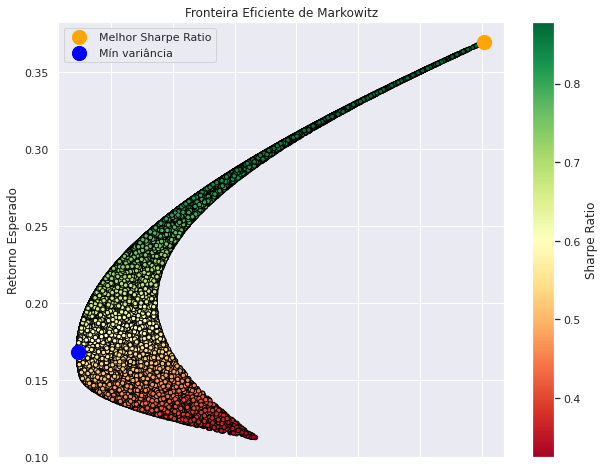

In [19]:
retorno_diario = dados.iloc[:, 1:len(acoes)+1].pct_change()
retorno_anual = retorno_diario.mean() * 250
cov_diaria = retorno_diario.cov()
cov_anual = cov_diaria * 250
retorno_carteira = []
peso_acoes = []
volatilidade_carteira = []
sharpe_ratio = []
numero_acoes = len(acoes) 
numero_carteiras = 100000
np.random.seed(101)

for cada_carteira in range(numero_carteiras):

    peso = np.random.random(numero_acoes)
    peso /= np.sum(peso)
    retorno = np.dot(peso, retorno_anual)

    volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov_anual, peso)))

    sharpe = retorno / volatilidade

    sharpe_ratio.append(sharpe)
    retorno_carteira.append(retorno)
    volatilidade_carteira.append(volatilidade)
    peso_acoes.append(peso)

carteira = {'Retorno': retorno_carteira,
             'Volatilidade': volatilidade_carteira,
             'Sharpe Ratio': sharpe_ratio}

for contar,acao in enumerate(acoes):
    carteira[acao+' Peso'] = [Peso[contar] for Peso in peso_acoes]


df = pd.DataFrame(carteira)

colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao+' Peso' for acao in acoes]
df = df[colunas]

menor_volatilidade = df['Volatilidade'].min()
maior_sharpe = df['Sharpe Ratio'].max()


carteira_sharpe = df.loc[df['Sharpe Ratio'] == maior_sharpe]
carteira_min_variancia = df.loc[df['Volatilidade'] == menor_volatilidade]



df.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=carteira_sharpe['Volatilidade'], y=carteira_sharpe['Retorno'], c='orange', 
            marker='o', s=200, label = 'Melhor Sharpe Ratio')
plt.scatter(x=carteira_min_variancia['Volatilidade'], y=carteira_min_variancia['Retorno'],
            c='blue', marker='o', s=200, label = 'Mín variância')

plt.legend()
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz')
plt.show()

In [20]:
print ("Essa é a carteira de Mínima Variância:", '\n', carteira_min_variancia.T)
print ('\n')
print ("Essa é a carteira com maior Sharpe Ratio:", '\n', carteira_sharpe.T)

Essa é a carteira de Mínima Variância: 
                   29922
Retorno        0.168205
Volatilidade   0.289362
Sharpe Ratio   0.581296
ITUB4.SA Peso  0.100319
CAML3.SA Peso  0.071591
VALE3.SA Peso  0.828090


Essa é a carteira com maior Sharpe Ratio: 
                    4697
Retorno        0.369379
Volatilidade   0.420805
Sharpe Ratio   0.877793
ITUB4.SA Peso  0.004040
CAML3.SA Peso  0.993935
VALE3.SA Peso  0.002025


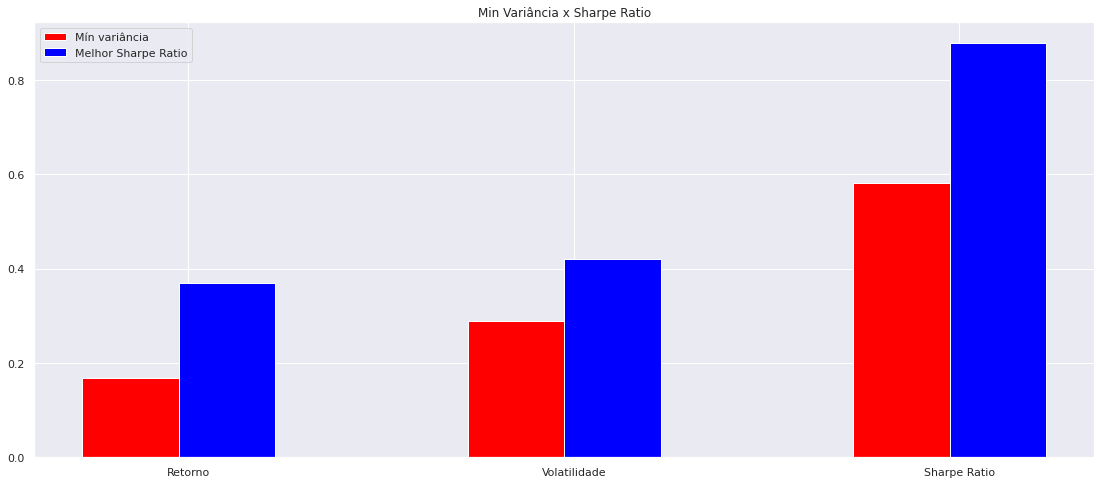

In [22]:
n = np.arange(3)
fig = plt.figure()
plt.bar(n + 0.00, list(carteira_min_variancia.iloc[: , 0:3].values[0]), color = 'red', width = 0.25, label = 'Mín variância')
plt.bar(n + 0.25, list(carteira_sharpe.iloc[: , 0:3].values[0]), color = 'blue', width = 0.25, label = 'Melhor Sharpe Ratio')
plt.title('Min Variância x Sharpe Ratio') 
plt.xticks(n + 0.15, ('Retorno', 'Volatilidade', 'Sharpe Ratio')) 
plt.legend() 
plt.show()

*ESCOLHA DOS PESOS*

In [23]:
decisao = int(input("Digite 1 para pesos com Min Variância, 2 para melhor Sharpe ou 3 para próprios pesos: "))
if decisao == 1:
    pesos = carteira_min_variancia.iloc[: , 3:].values
    pesoacao = carteira_min_variancia.iloc[: , 3:]
    print('VOCÊ ESCOLHEU PESOS PARA MENOR VOLATILIDADE!')
elif decisao == 2:
    pesos = carteira_sharpe.iloc[: , 3:].values
    pesoacao = carteira_sharpe.iloc[: , 3:]
    print('VOCÊ ESCOLHEU PESOS PARA MELHOR SHARPE RATIO!')
else:
    pesos_input=[]
    print('VOCÊ ESCOLHEU DIGITAR OS PESOS MANUALMENTE!')
    for i in range(len(acoes)):
        p = float(input("Digite o peso, em porcentagem, da %s:" %(acoes[i])))
        pe = p/100
        pesos_input.append(pe)
    pesos = np.array(pesos_input)

Digite 1 para pesos com Min Variância, 2 para melhor Sharpe ou 3 para próprios pesos: 1
VOCÊ ESCOLHEU PESOS PARA MENOR VOLATILIDADE!


*VERIFICAR QUANTIDADE DE DADOS*

In [24]:
contador_dados =[]   
for i in range(len(acoes)):
    contador_dados.append(len(dados.iloc[: ,i]))
for i in range(len(acoes)):
    print("A ação %s tem %i de linhas" %(acoes[i], contador_dados[i]))

A ação ITUB4.SA tem 897 de linhas
A ação CAML3.SA tem 897 de linhas
A ação VALE3.SA tem 897 de linhas


*GRAFICO AÇÕES*

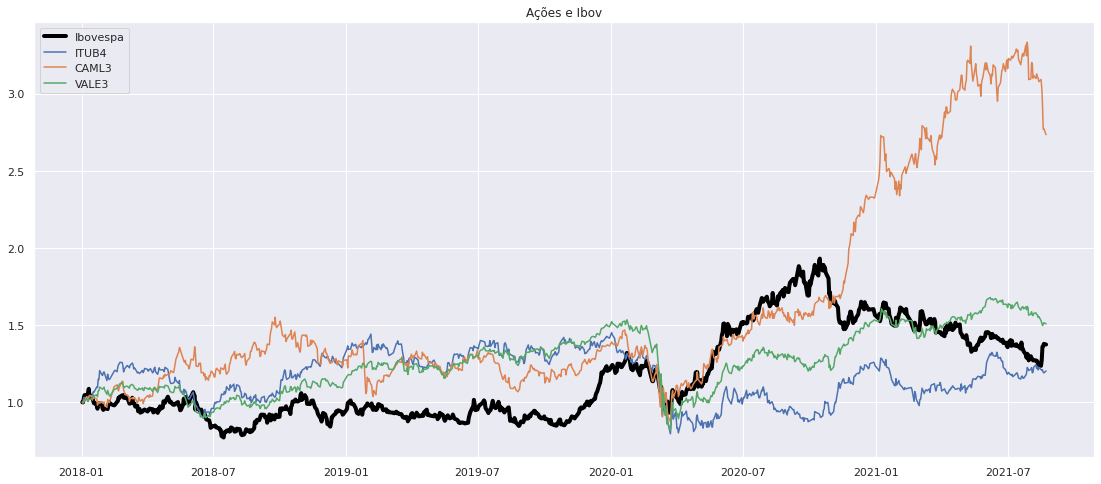

In [25]:
plt.plot((dados.iloc[ : , 0]/dados.iloc[ 0 , 0]), c = 'black', linewidth = 4)
plt.plot(dados.iloc[ : , 1 : len(acoes) + 1]/dados.iloc[ 0 , 1 : len(acoes) + 1])
plt.legend(dados.columns)
plt.title('Ações e Ibov')
plt.show()

*GRÁFICO RETORNO PORTIFÓLIO*

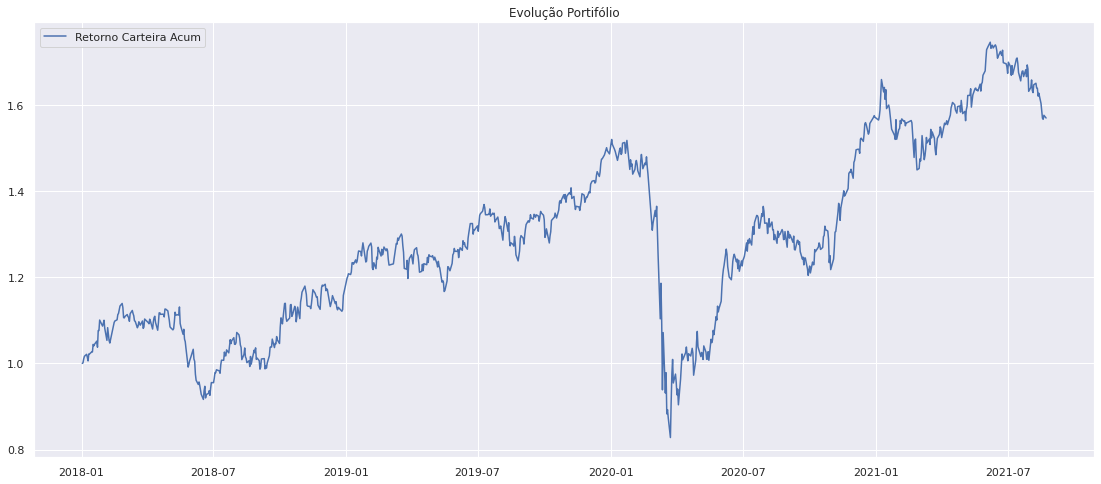

In [26]:
dados['Retorno'] = np.dot(dados.iloc[: , 1 : len(acoes) + 1].pct_change(), pesos.T)
dados['Retorno Carteira Acum.'] = (1 + dados['Retorno']).cumprod()
dados['Retorno Carteira Acum.'].iloc [0] = 1 

plt.plot(dados['Retorno Carteira Acum.'], label = "Retorno Carteira Acum")
plt.title("Evolução Portifólio")
plt.legend()
plt.show()

*GRÁFICO RETORNO PORTIFÓLIO VS IBOVESPA*

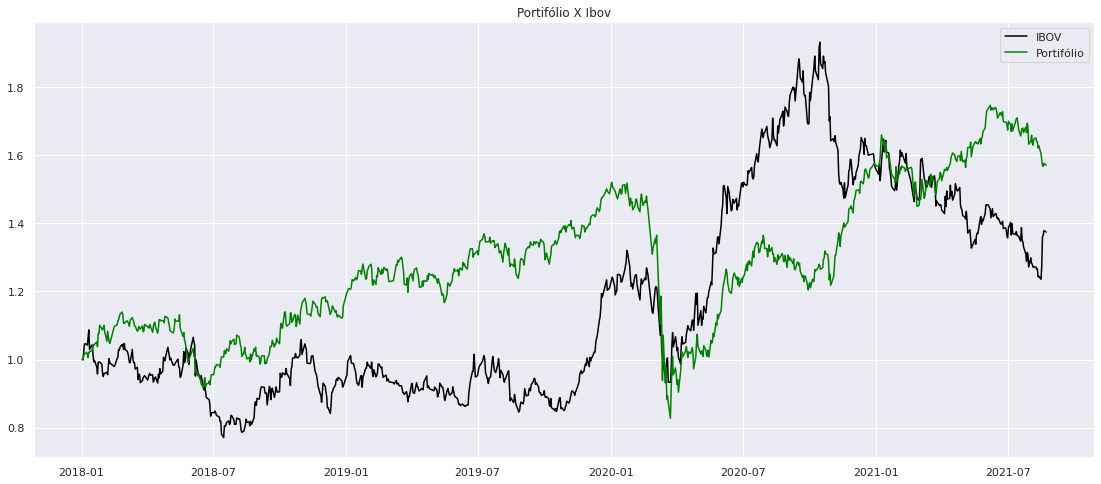

In [27]:
plt.plot(dados.iloc[ : , 0]/dados.iloc[ 0 , 0], label = "IBOV" , c = "Black")
plt.plot(dados['Retorno Carteira Acum.'], label = "Portifólio", c = 'green')
plt.legend()
plt.title("Portifólio X Ibov")
plt.show()

*CÁLCULO DOS RETORNOS*

In [28]:
print ('O retorno de cada ação isolada foi de:' )
for i in range(len(acoes)):
    print ("Ação %s teve retorno anualizado de %.2f" %(name_colunas[i+1], retorno_anual[i]*100) + "%")

print('\n')
retorno_portifolio = np.dot(retorno_anual,pesos.T)
retorno_ibov = dados["Ibovespa"].pct_change().mean() * 250
print ('O retorno anualizado do portifólio foi de %.2f' %(retorno_portifolio*100) + "%" )
print ('O retorno anualizado do ibovespa foi de %.2f' %(retorno_ibov*100) + "%" )
print ('A diferença foi de %.2f' %((retorno_portifolio-retorno_ibov)*100) + "%")
print ("Que representa %.2f" %((retorno_portifolio/retorno_ibov - 1)*100)+"% a mais que o Ibovespa")

O retorno de cada ação isolada foi de:
Ação ITUB4 teve retorno anualizado de 11.18%
Ação CAML3 teve retorno anualizado de 37.09%
Ação VALE3 teve retorno anualizado de 15.75%


O retorno anualizado do portifólio foi de 16.82%
O retorno anualizado do ibovespa foi de 14.19%
A diferença foi de 2.63%
Que representa 18.57% a mais que o Ibovespa


*VARIÂNCIA DO PORTIFÓLIO*

In [29]:
var_mercado_aux = np.log(dados/dados.shift(1))
bov_var = var_mercado_aux["Ibovespa"].var()*250


var_acoes = []
for i in range(len(acoes)):
    var_acoes.append(retorno_diario.iloc[: , i].var()*250)
pfolio_var = np.dot(pesos, np.dot(retorno_diario.cov()*250,pesos.T)) 

for i in range(len(acoes)):
    print("A ação %s tem varição de %.2f " %(name_colunas[i+1], var_acoes[i]*100) +"%")


print ('\n')
print ('A variância do portifólio é de %.2f' %(pfolio_var*100) + "%" )
print ('A variância do ibovespa é de %.2f' %(bov_var*100) + "%" )


A ação ITUB4 tem varição de 12.07 %
A ação CAML3 tem varição de 17.85 %
A ação VALE3 tem varição de 8.44 %


A variância do portifólio é de 8.37%
A variância do ibovespa é de 10.65%


*VOLATILIDADE DO PORTIFÓLIO*

In [30]:
vol_acoes = []
for i in range(len(acoes)):
    vol_acoes.append(var_acoes[i]** 0.5)
for i in range(len(acoes)):
    print("A ação %s tem vol de %.2f " %(name_colunas[i+1], vol_acoes[i]*100) + "%")
pfolio_vol = pfolio_var ** 0.5 
print('\n')
print ('A voltatilidade do portifólio é de %.2f' %(pfolio_vol*100) + "%" )
print ('A voltatilidade do ibovespa é de %.2f' %((bov_var**0.5)*100) + "%" )

A ação ITUB4 tem vol de 34.74 %
A ação CAML3 tem vol de 42.24 %
A ação VALE3 tem vol de 29.06 %


A voltatilidade do portifólio é de 28.94%
A voltatilidade do ibovespa é de 32.63%


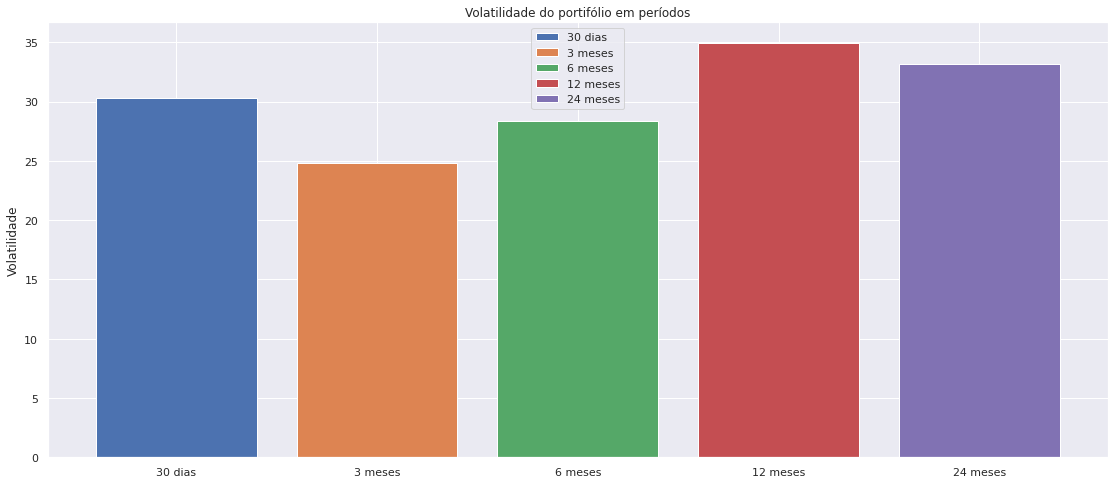

In [31]:
###########
# GRÁFICO VOLATILIDADE EM PERIODOS
###########

port_ibov = pd.DataFrame(dados["Ibovespa"].pct_change().iloc[ 1: ])
port_ibov.insert(loc = 1 , column = 'Portifólio', value = dados['Retorno'].iloc[ 1: ])

x1 = '30 dias'
plt.bar(x1,port_ibov.iloc[len(port_ibov)-30:len(port_ibov),0].std() *255 ** 0.5 *100, label = x1)
x2 = '3 meses'
plt.bar(x2,port_ibov.iloc[len(port_ibov)-90:len(port_ibov),0].std() *255 ** 0.5 *100, label = x2)
x3 = '6 meses'
plt.bar(x3,port_ibov.iloc[len(port_ibov)-180:len(port_ibov),0].std() *255 ** 0.5 *100, label = x3)
x4 = '12 meses'
plt.bar(x4,port_ibov.iloc[len(port_ibov)-360:len(port_ibov),0].std() *255 ** 0.5 *100, label = x4)
x5 = '24 meses'
plt.bar(x5,port_ibov.iloc[len(port_ibov)-720:len(port_ibov),0].std() *255 ** 0.5 *100, label = x5)

plt.ylabel('Volatilidade')
plt.xlabel('  ')
plt.legend()
plt.title("Volatilidade do portifólio em períodos")
plt.show()

In [32]:
resum_ibov = [retorno_ibov, bov_var**0.5, retorno_ibov/(bov_var**0.5)]
resum_port = [retorno_portifolio[0], pfolio_vol[0][0], retorno_portifolio[0]/pfolio_vol[0][0]]

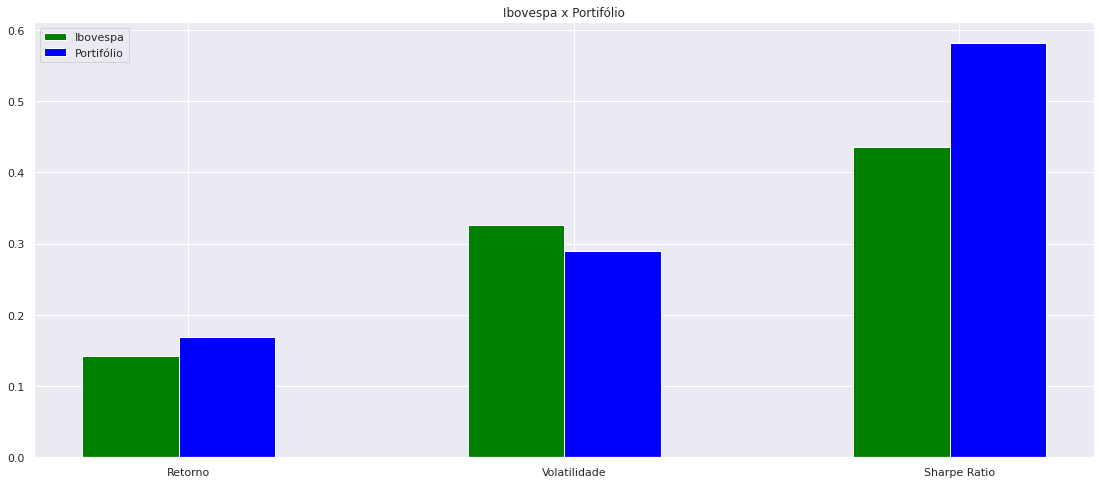

In [34]:
n = np.arange(3)
fig = plt.figure()
plt.bar(n + 0.00, resum_ibov, color = 'green', width = 0.25, label = 'Ibovespa')
plt.bar(n + 0.25, resum_port, color = 'blue', width = 0.25, label = 'Portifólio')
plt.title('Ibovespa x Portifólio') 
plt.xticks(n + 0.15, ('Retorno', 'Volatilidade', 'Sharpe Ratio')) 
plt.legend() 
'''plt.savefig('B2W vs Ibov', dpi = 1000)'''
plt.show()

*CORRELAÇÃO ENTRE RETORNOS*

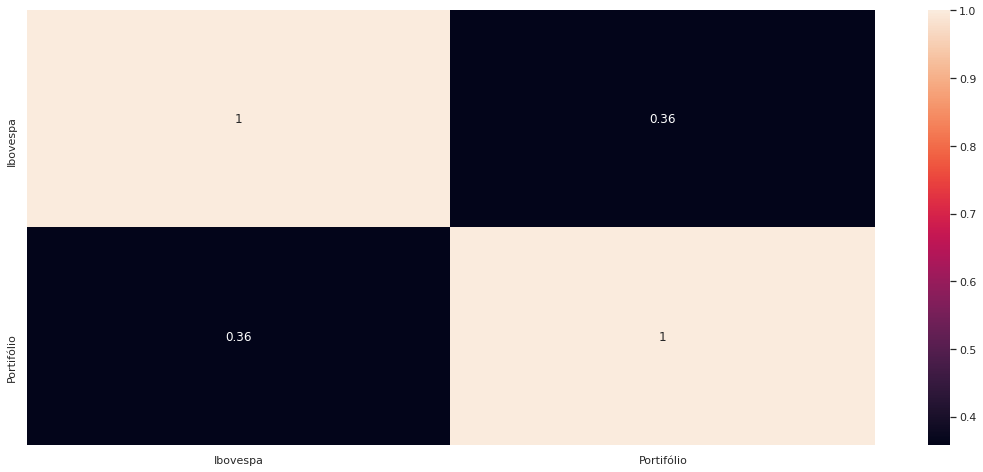

In [35]:
matriz_correlação_pfolio_ibov= port_ibov.corr()
matiz_correlacao_acoes_ibov = dados.iloc[ : , 0: len(acoes_base)].corr()

sns.heatmap(matriz_correlação_pfolio_ibov, annot = True)

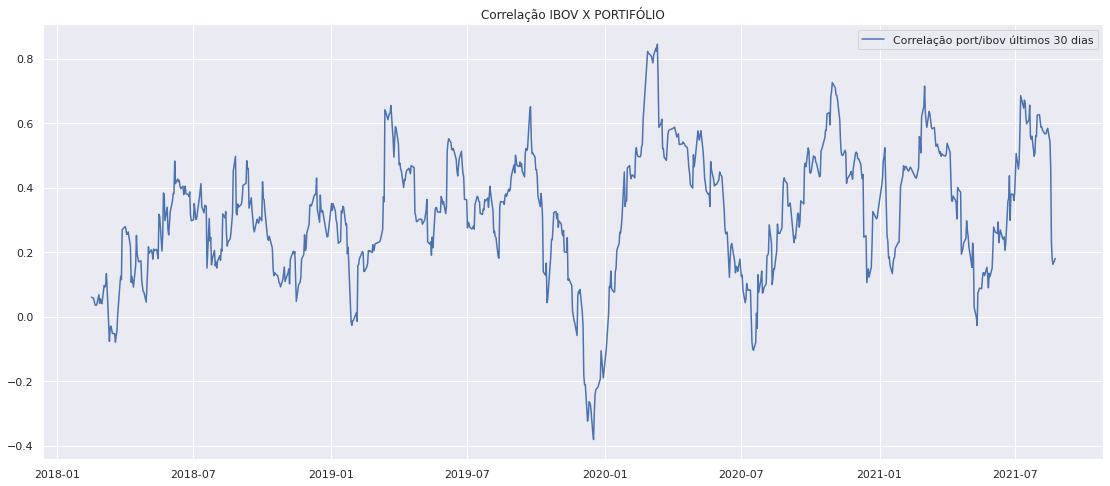

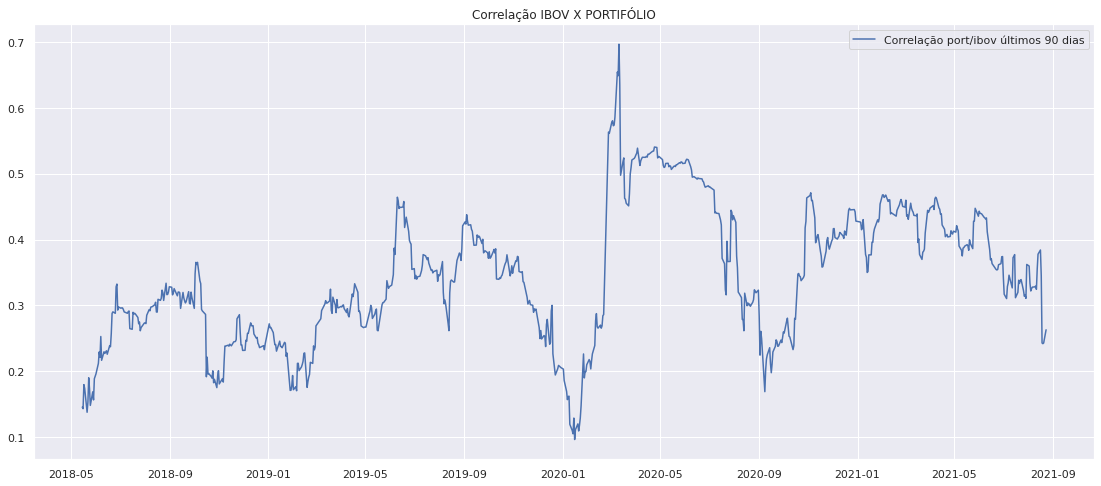

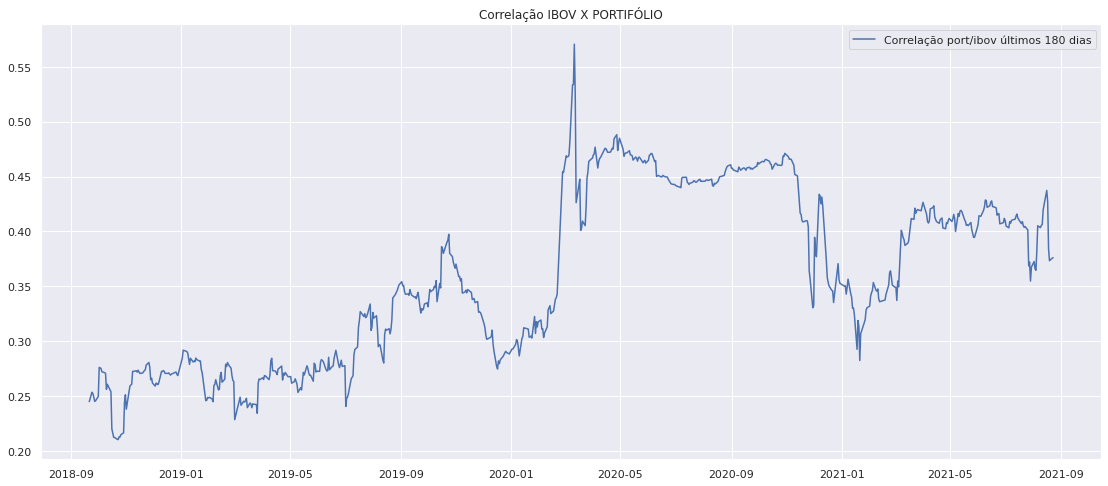

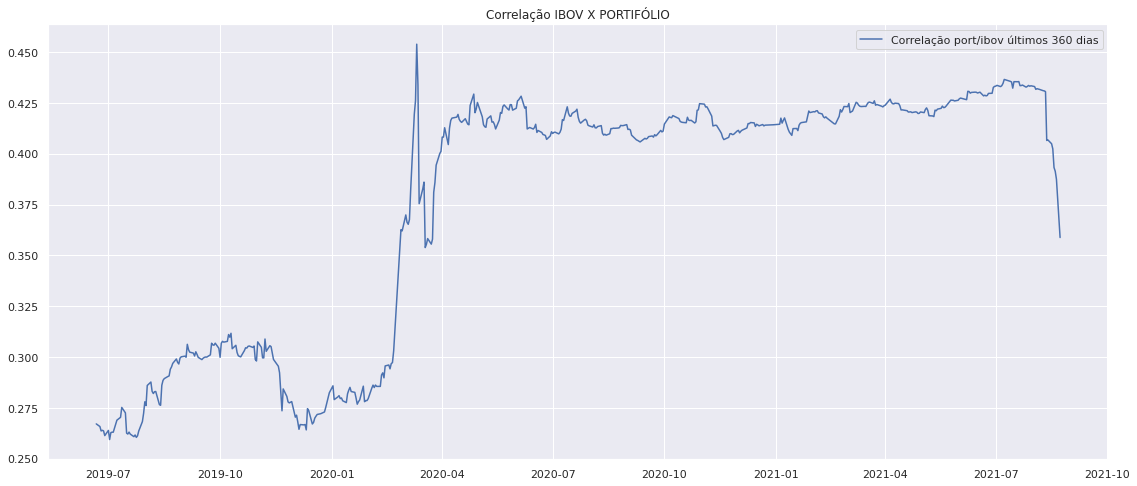

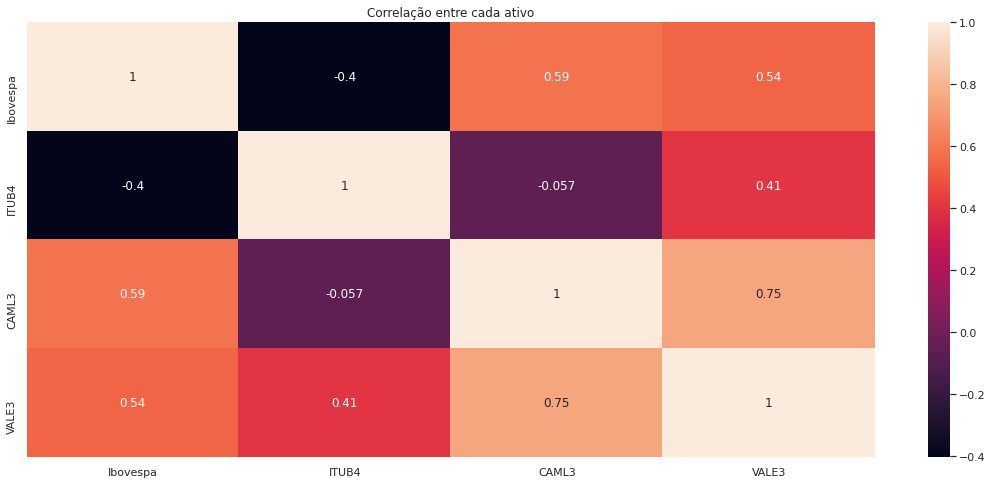

In [38]:
print('\n')

plt.plot(port_ibov['Ibovespa'].rolling(30).corr(port_ibov.iloc[:,1]), label = "Correlação port/ibov últimos 30 dias")
plt.legend()
plt.title('Correlação IBOV X PORTIFÓLIO')
plt.show()

print('\n')

plt.plot(port_ibov['Ibovespa'].rolling(90).corr(port_ibov.iloc[:,1]), label = "Correlação port/ibov últimos 90 dias")
plt.legend()
plt.title('Correlação IBOV X PORTIFÓLIO')
plt.show()

print('\n')

plt.plot(port_ibov['Ibovespa'].rolling(180).corr(port_ibov.iloc[:,1]), label = "Correlação port/ibov últimos 180 dias")
plt.legend()
plt.title('Correlação IBOV X PORTIFÓLIO')
plt.show()

print('\n')

plt.plot(port_ibov['Ibovespa'].rolling(360).corr(port_ibov.iloc[:,1]), label = "Correlação port/ibov últimos 360 dias")
plt.legend()
plt.title('Correlação IBOV X PORTIFÓLIO')
plt.show()

print('\n')

plt.title("Correlação entre cada ativo");
sns.heatmap(matiz_correlacao_acoes_ibov, annot = True)
plt.show()

*BETA PORTIFÓLIO E AÇÕES* 

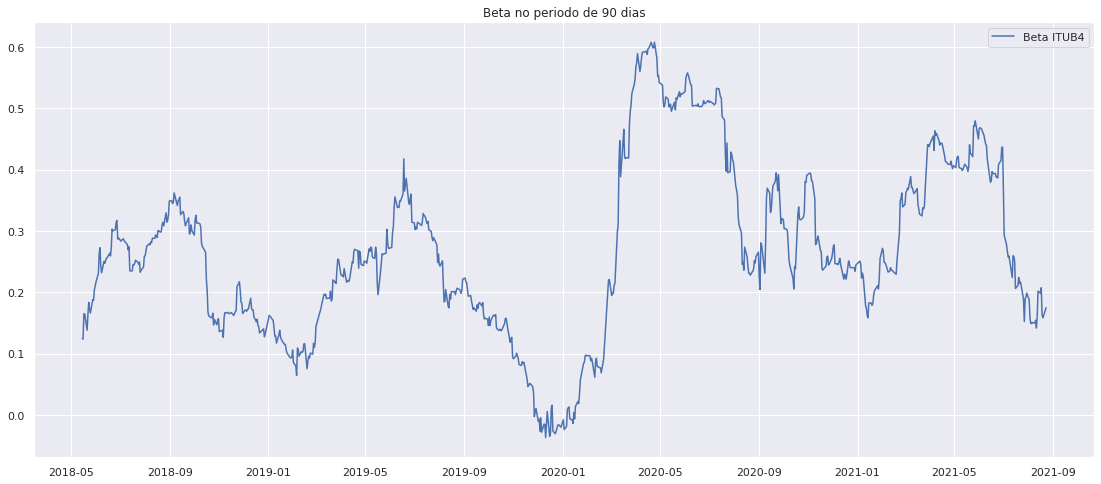

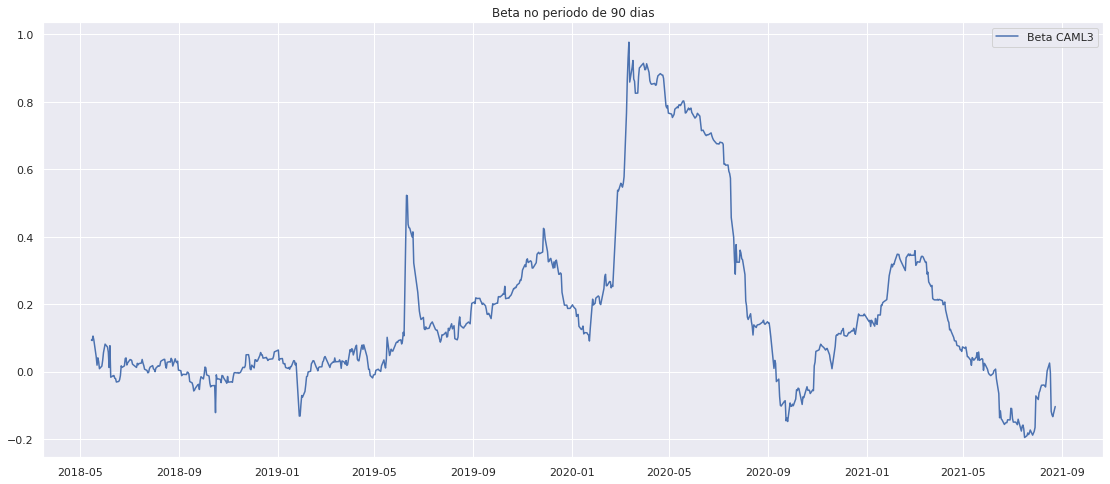

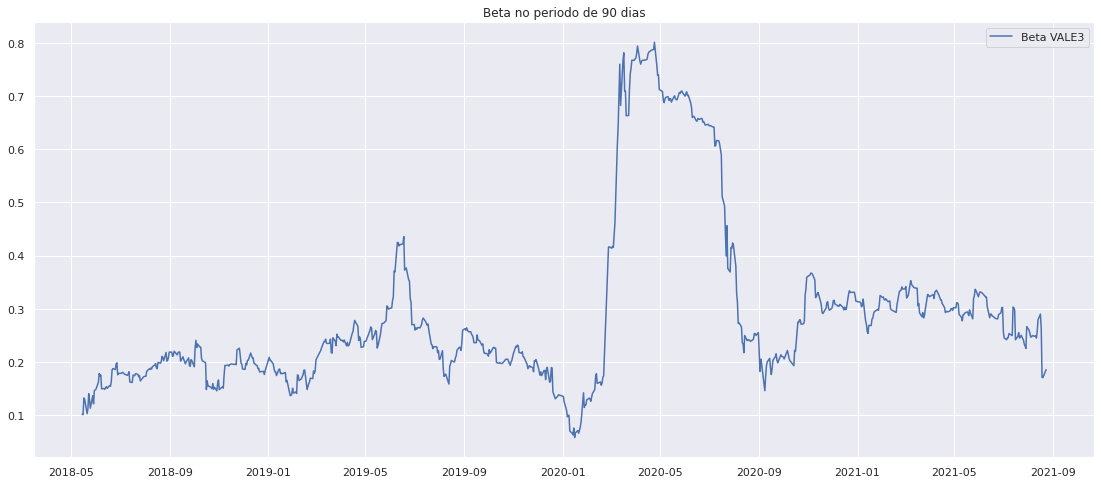



A ação ITUB4 tem beta de 0.293
A ação CAML3 tem beta de 0.233
A ação VALE3 tem beta de 0.327
O portifólio tem beta de 0.317


In [39]:
betas = []

for i in range(len(acoes)):
  betas.append(np.cov(retorno_diario[name_colunas[i+1]].dropna(), port_ibov['Ibovespa'])[0][1] / port_ibov['Ibovespa'].var())
    
    
def grafico_beta(perido = 90):
  title = 'Beta no periodo de {} dias'.format(perido)
  for i in range(len(acoes)):
    legend = 'Beta {}'.format(name_colunas[i+1])
    plt.plot(port_ibov['Ibovespa'].rolling(perido).cov(retorno_diario[name_colunas[i+1]])/(port_ibov['Ibovespa'].rolling(perido).var()), label = legend)
    plt.legend()
    plt.title(title)
    plt.show()
    print('\n')

grafico_beta()

for i in range(len(acoes)):
    print("A ação %s tem beta de %.3f" %(name_colunas[i + 1], betas[i]))
    

beta_portifolio = np.cov(port_ibov['Ibovespa'], port_ibov["Portifólio"])[0][1]/port_ibov['Ibovespa'].var()
print("O portifólio tem beta de %.3f" %(beta_portifolio))

*BACKTESTING DO PORTIFÓLIO*

Start date,2018-01-03
End date,2021-08-23
Total months,42
,Backtest
Annual return,13.5%
Cumulative returns,57.0%
Annual volatility,29.1%
Sharpe ratio,0.58
Calmar ratio,0.30
Stability,0.59
Max drawdown,-45.5%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,45.53,2020-01-02,2020-03-23,2020-12-10,246
1,19.56,2018-02-26,2018-06-18,2018-10-09,162
2,12.65,2021-01-08,2021-02-26,2021-05-28,101
3,10.27,2019-03-18,2019-05-16,2019-06-19,68
4,10.26,2021-06-07,2021-08-19,NaT,NaN


Stress Events,mean,min,max
New Normal,0.07%,-14.17%,14.16%


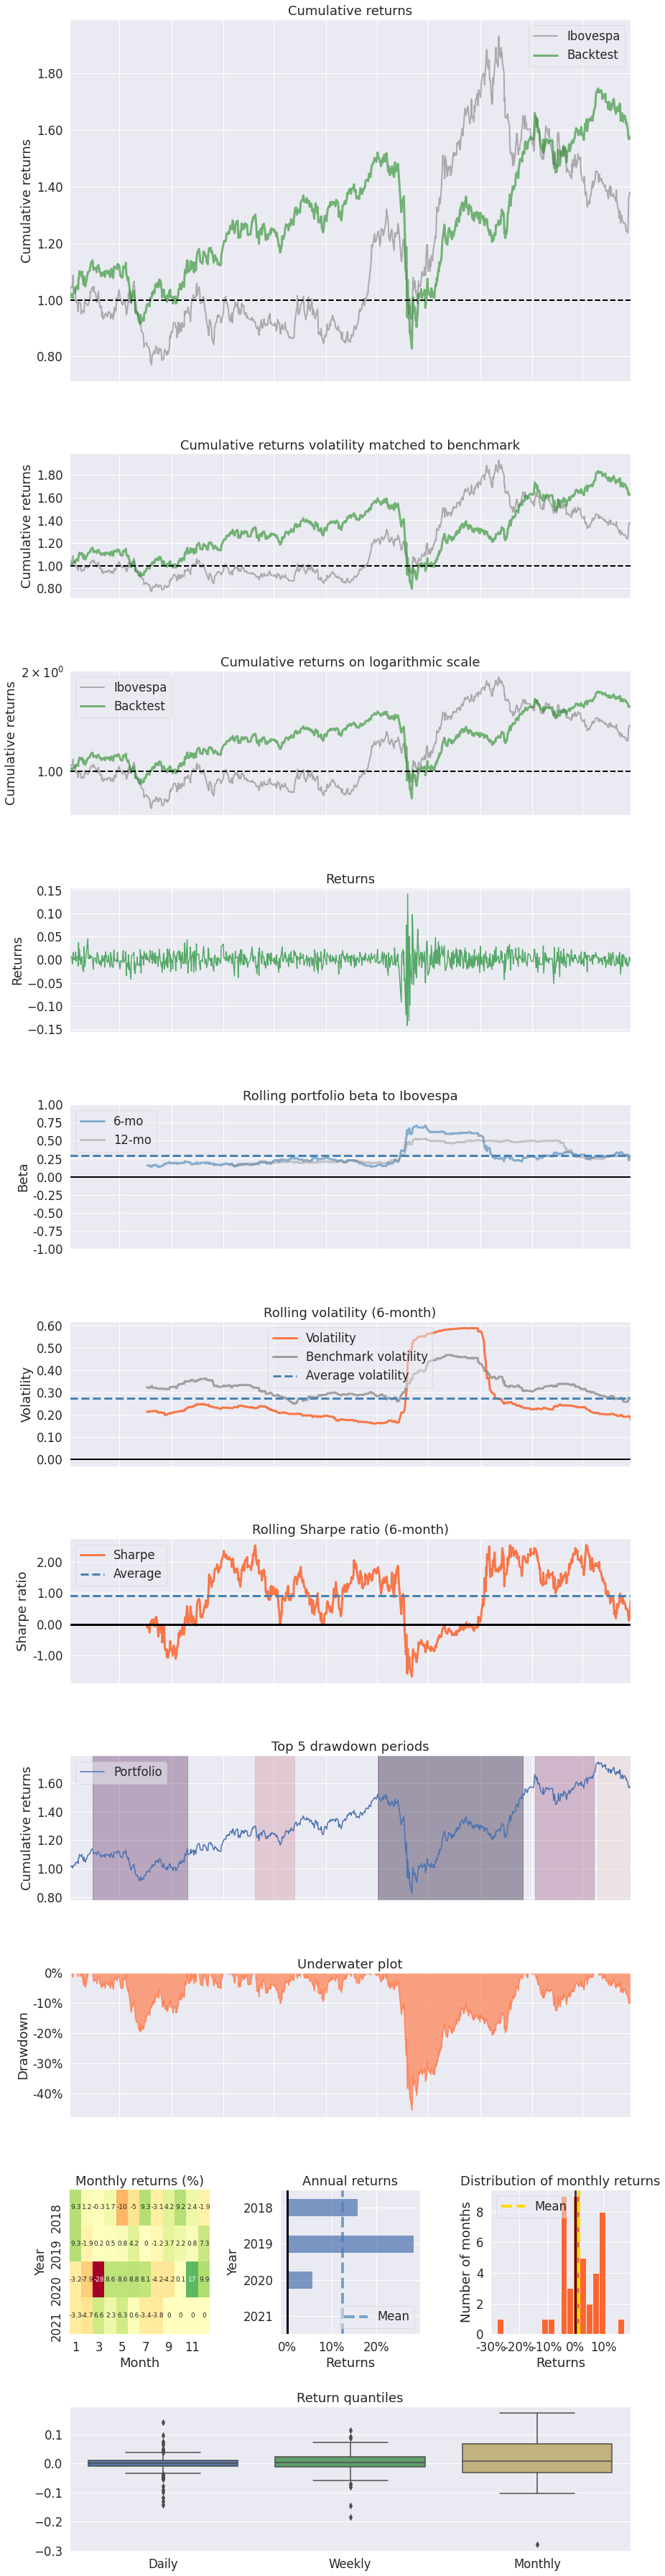

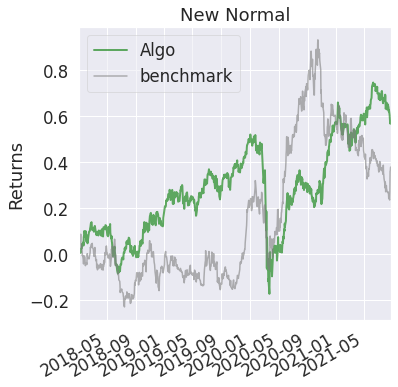

In [40]:
pf.create_full_tear_sheet(port_ibov['Portifólio'], benchmark_rets = port_ibov["Ibovespa"])

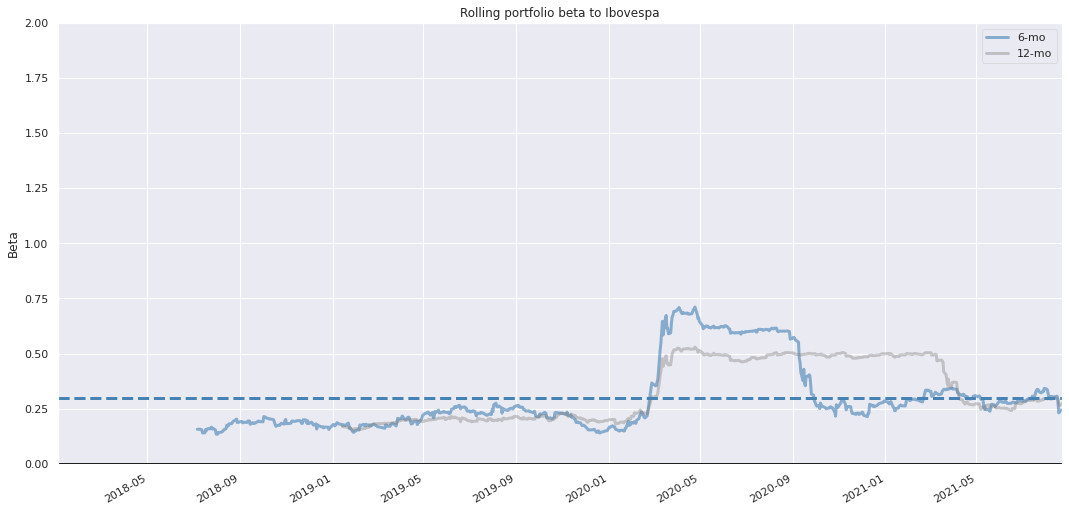

In [41]:
fig, ax1 = plt.subplots(figsize = (18,9))
pf.plot_rolling_beta(port_ibov['Portifólio'], port_ibov['Ibovespa'], ax=ax1)
plt.ylim(0,2)
plt.show()

*MONTE CARLO PREVISAO VALOR PORTIFOLIO*

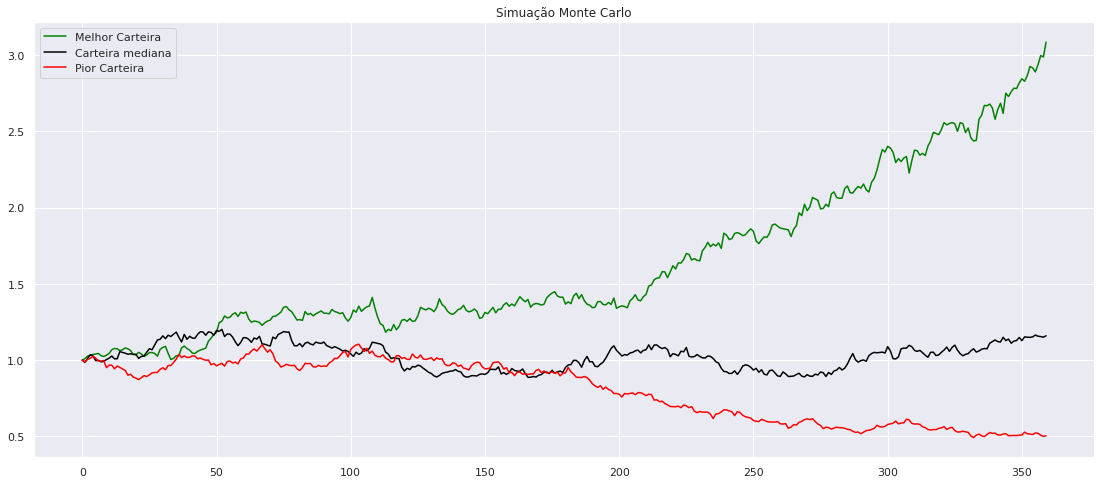

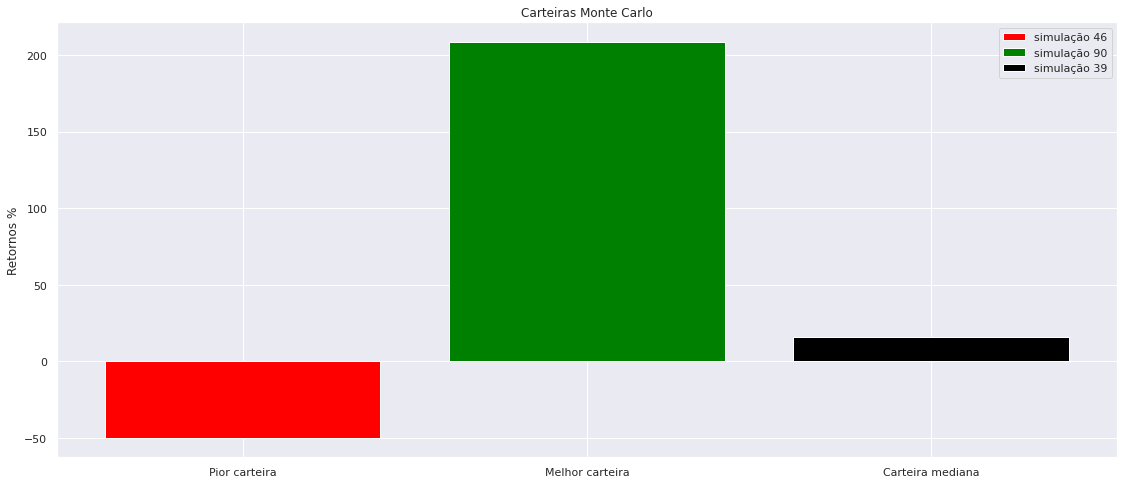



Pior Retorno: -49.61 %
Pior Retorno: 208.29 %
Pior Retorno: 15.98 %


In [43]:
drift = np.array(dados['Retorno'].mean() - dados['Retorno'].var()/2)
std = np.array(dados['Retorno'].std())
t_intervalo = 360
iteracao = 100
retorno_diario = np.exp(drift + std * norm.ppf(np.random.rand(t_intervalo, iteracao)))
port_valores = pd.DataFrame(np.dot(dados.iloc[: , 1 : len(acoes) + 1], pesos.T))
s0 = port_valores.iloc[-1]
preco_lista = np.zeros_like(retorno_diario)
preco_lista[0] = s0
for t in range(1, t_intervalo):
    preco_lista[t] = preco_lista[t - 1] * retorno_diario[t]
preco_lista = pd.DataFrame(preco_lista)
columnames = []
for i in range(iteracao):
  columnames.append('simulação {}'.format(i+1))
preco_lista.columns = columnames
port_mc = preco_lista/preco_lista.iloc[0]
melhores_piores_desemp = port_mc.iloc[-1].sort_values()
carteira_mc = pd.DataFrame()
carteira_mc['Pior carteira'] = port_mc[melhores_piores_desemp.index[0]]
carteira_mc['Melhor carteira'] = port_mc[melhores_piores_desemp.index[iteracao-1]] 
carteira_mc['Carteira mediana'] = port_mc[melhores_piores_desemp.index[iteracao-int(iteracao/2)]]

plt.plot(carteira_mc['Melhor carteira'], label = 'Melhor Carteira', color = 'green')
plt.plot(carteira_mc['Carteira mediana'], label = 'Carteira mediana', color = 'black')
plt.plot(carteira_mc['Pior carteira'], label = 'Pior Carteira', color = 'red')
plt.legend()
plt.title('Simuação Monte Carlo')
plt.show()

print('\n')

plt.bar('Pior carteira', list(carteira_mc.iloc[ -1 , :] - 1)[0] * 100, label = melhores_piores_desemp.index[0], color = 'red')
plt.bar('Melhor carteira', list(carteira_mc.iloc[ -1 , :] - 1)[1] * 100, label = melhores_piores_desemp.index[iteracao-1], color = 'green')
plt.bar('Carteira mediana', list(carteira_mc.iloc[ -1 , :] - 1)[2] * 100, label = melhores_piores_desemp.index[iteracao-int(iteracao/2)], color = 'black')

plt.ylabel('Retornos %')
plt.xlabel('  ')
plt.legend()
plt.title("Carteiras Monte Carlo")
plt.show()

print('\n')
print('Pior Retorno: {:.2f} %' .format(list(carteira_mc.iloc[ -1 , :] - 1)[0] *100))
print('Pior Retorno: {:.2f} %' .format(list(carteira_mc.iloc[ -1 , :] - 1)[1] *100))
print('Pior Retorno: {:.2f} %' .format(list(carteira_mc.iloc[ -1 , :] - 1)[2] *100))